In [192]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [193]:
df = pd.read_csv("https://raw.githubusercontent.com/alexeygrigorev/datasets/master/AB_NYC_2019.csv")
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


<AxesSubplot:xlabel='price', ylabel='Count'>

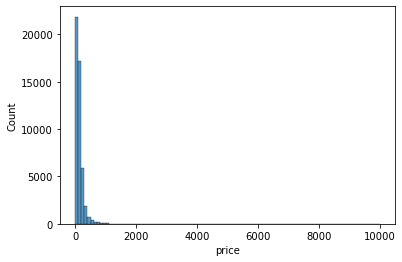

In [194]:
# Not a long tail
sns.histplot(df.price, bins=100)

In [195]:
cols = ["latitude", "longitude", "price", "minimum_nights", "number_of_reviews", "reviews_per_month", "calculated_host_listings_count", "availability_365"]
df = df[cols]
df

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,40.64749,-73.97237,149,1,9,0.21,6,365
1,40.75362,-73.98377,225,1,45,0.38,2,355
2,40.80902,-73.94190,150,3,0,NaN,1,365
3,40.68514,-73.95976,89,1,270,4.64,1,194
4,40.79851,-73.94399,80,10,9,0.10,1,0
...,...,...,...,...,...,...,...,...
48890,40.67853,-73.94995,70,2,0,NaN,2,9
48891,40.70184,-73.93317,40,4,0,NaN,2,36
48892,40.81475,-73.94867,115,10,0,NaN,1,27
48893,40.75751,-73.99112,55,1,0,NaN,6,2


In [196]:
# Question 1
# reviews_per_month is missing 10052 values
df.isnull().sum()

latitude                              0
longitude                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [197]:
# Question 2
# Median nights (50th percentile) = 3
df["minimum_nights"].describe()

count    48895.000000
mean         7.029962
std         20.510550
min          1.000000
25%          1.000000
50%          3.000000
75%          5.000000
max       1250.000000
Name: minimum_nights, dtype: float64

In [198]:
n = len(df)
n_val = int(n * 0.2)
n_test = int(n * 0.2)
n_train = n - n_val - n_test

n, n_val, n_test, n_train

(48895, 9779, 9779, 29337)

In [199]:
idx = np.arange(n)
np.random.seed(42)
np.random.shuffle(idx)
idx

array([  879, 44383, 15394, ..., 38158,   860, 15795])

In [200]:
df_train = df.iloc[idx[:n_train]]
df_val = df.iloc[idx[n_train:n_train + n_val]]
df_test = df.iloc[idx[n_train+n_val:]]
len(df_train), len(df_val), len(df_test)

(29337, 9779, 9779)

In [201]:
df_train.head()

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
879,40.64354,-73.97777,89,3,62,0.71,1,189
44383,40.70666,-73.90779,30,21,0,NaN,1,73
15394,40.76116,-73.99016,120,2,17,0.43,1,0
43230,40.70763,-74.01050,470,2,5,1.88,327,272
16332,40.79658,-73.93287,199,2,30,0.80,1,30


In [202]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [203]:
df_test

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,40.68866,-73.96147,48,20,24,0.78,1,304
1,40.68554,-73.96651,120,3,3,0.47,1,0
2,40.76805,-73.94929,150,1,2,2.00,1,83
3,40.75571,-73.99594,90,15,0,NaN,1,0
4,40.70780,-74.00675,130,29,0,NaN,327,349
...,...,...,...,...,...,...,...,...
9774,40.84650,-73.94319,60,1,0,NaN,1,0
9775,40.73957,-74.00082,85,2,4,1.90,1,76
9776,40.78318,-73.97372,130,30,1,0.34,5,261
9777,40.77508,-73.97990,150,2,11,0.13,1,2


In [204]:
y_train = np.log1p(df_train.price.values)
y_val = np.log1p(df_val.price.values)
y_test = np.log1p(df_test.price.values)
y_train

array([4.49980967, 3.4339872 , 4.79579055, ..., 4.61512052, 4.2341065 ,
       3.8286414 ])

In [205]:
del df_train['price']
del df_val['price']
del df_test['price']

In [206]:
df_train.head()

,latitude,longitude,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,40.64354,-73.97777,3,62,0.71,1,189
1,40.70666,-73.90779,21,0,NaN,1,73
2,40.76116,-73.99016,2,17,0.43,1,0
3,40.70763,-74.01050,2,5,1.88,327,272
4,40.79658,-73.93287,2,30,0.80,1,30


In [207]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])
    
    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

In [208]:
w0, w = train_linear_regression(df_train.fillna(0).values, y_train)
w0, w

(-419.9126587294167,
 array([ 1.30676225e+00, -5.02167855e+00, -5.59803110e-04, -4.07634896e-04,
        -8.25470065e-03,  1.33371320e-03,  6.50203890e-04]))

In [209]:
y_pred_zeros = w0 + df_train.dot(w)
y_pred_zeros

0        4.782775
1             NaN
2        4.897021
3        5.533779
4        4.666767
           ...   
29332         NaN
29333    4.816368
29334    4.820489
29335    4.869449
29336    4.616126
Length: 29337, dtype: float64

<AxesSubplot:ylabel='Count'>

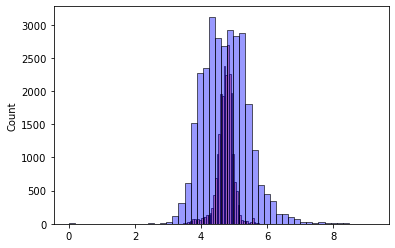

In [210]:
sns.histplot(y_pred_zeros, color='red', alpha=0.4, bins=50)
sns.histplot(y_train, color='blue', alpha=0.4, bins=50)

In [211]:
w0, w = train_linear_regression(df_train.fillna(df_train.reviews_per_month.mean()).values, y_train)
w0, w

(-423.53930827853833,
 array([ 1.31148321e+00, -5.06799071e+00, -4.87741553e-04, -6.63849280e-04,
         5.34563275e-03,  1.32706019e-03,  6.38794182e-04]))

In [212]:
y_pred_mean = w0 + df_train.dot(w)
y_pred_mean

0        4.765896
1             NaN
2        4.891077
3        5.546047
4        4.659696
           ...   
29332         NaN
29333    4.813015
29334    4.835269
29335    4.877690
29336    4.606829
Length: 29337, dtype: float64

<AxesSubplot:ylabel='Count'>

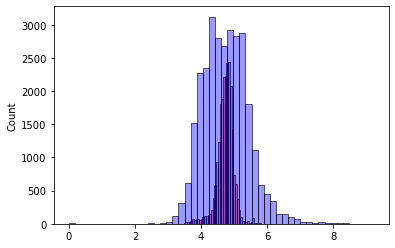

In [213]:
sns.histplot(y_pred_mean, color='red', alpha=0.4, bins=50)
sns.histplot(y_train, color='blue', alpha=0.4, bins=50)

In [214]:
def rmse(y, y_pred):
    se = (y - y_pred) ** 2
    mse = se.mean()
    return np.sqrt(mse)

In [215]:
# Question 3
# They both look the same to me
rmse(y_train, y_pred_zeros).round(2)

0.62

In [216]:
rmse(y_train, y_pred_mean).round(2)

0.62

In [217]:
def train_linear_regression_reg(X, y, r=0.001):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])
    
    XTX = X.T.dot(X)
    XTX = XTX + r * np.eye(XTX.shape[0])
    
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

In [218]:
# Question 4
# 0 gives the "best"
for r in [0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10]:
    w0, w = train_linear_regression_reg(df_train.fillna(0).values, y_train, r)
    y_pred_reg = w0 + df_train.dot(w)
    print(rmse(y_train, y_pred_reg).round(2))

0.62
0.62
0.62
0.62
0.62
0.65
0.65
0.65
0.65


In [219]:
def split_data(dataframe, seed):
#     dataframe = dataframe.copy()
    n = len(dataframe)
    n_val = int(n * 0.2)
    n_test = int(n * 0.2)
    n_train = n - n_val - n_test
    idx = np.arange(n)
    np.random.seed(seed)
    np.random.shuffle(idx)
    dataframe_train = dataframe.iloc[idx[:n_train]]
    dataframe_val = dataframe.iloc[idx[n_train:n_train + n_val]]
    dataframe_test = dataframe.iloc[idx[n_train+n_val:]]
    dataframe_train = dataframe_train.reset_index(drop=True)
    dataframe_val = dataframe_val.reset_index(drop=True)
    dataframe_test = dataframe_test.reset_index(drop=True)
    return dataframe_train, dataframe_val, dataframe_test
    #len(dataframe_train), len(dataframe_val), len(dataframe_test)

In [224]:
rmse_vals = []
for seed in [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]:
    df_train_seed, df_val_seed, df_test_seed = split_data(df.copy(), seed)
    y_train_seed = np.log1p(df_train_seed.price.values)
    y_val_seed = np.log1p(df_val_seed.price.values)
    y_test_seed = np.log1p(df_test_seed.price.values)
    del df_train_seed['price']
    del df_val_seed['price']
    del df_test_seed['price']
    w0, w = train_linear_regression(df_train_seed.fillna(0).values, y_train_seed)
    y_pred_seed = w0 + df_val_seed.dot(w)
    val = rmse(y_val_seed, y_pred_seed)
    print(val)
    rmse_vals.append(val)


0.6225612527122075
0.6136950483989809
0.6220712986269201
0.6134841315152723
0.6137929474136439
0.6040844423609348
0.6068338489560472
0.6235301925884748
0.6214296224982261
0.6202251572052944


In [226]:
# Question 5 
# Not getting the right answer
np.std(rmse_vals).round(3)

0.007

In [228]:
# Question 6
# Ran out of time...
# Need to combine train/val datasets
df_train_final, df_val_final, df_test_final = split_data(df.copy(), 9)
y_train_final = np.log1p(df_train_final.price.values)
y_val_final = np.log1p(df_val_final.price.values)
y_test_final = np.log1p(df_test_final.price.values)
del df_train_final['price']
del df_val_final['price']
del df_test_final['price']
w0, w = train_linear_regression_reg(df_train_final.fillna(0).values, y_train_final, 0.001)
y_pred_final = w0 + df_train_final.dot(w)
val = rmse(y_train_final, y_pred_final)
val.round(2)

0.62